# Initial Testing

#### Select Initial stocks you want to analyze. This cell will conduct the intial cointegration test between each pair and then identify pairs that pass the test. Next, This cell will calculate the spread between the remaining pairs and run an ADF test on the spread

In [45]:
# Import the packages needed for this task:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) 

# Initialize the top car manufacturing companies into a list (using their ticker symbols):
stocks = ['F', 'GM', 'TSLA', 'TM', 'HMC', 'NSANY', 'VWAGY', 'BAMXF', 'POAHY',]

# Download the data for each stock in the list:
stock_data = {stock: yf.download(stock, period='10y')['Close'] for stock in stocks}

# Initialize a DataFrame to store the p-values:
p_values = pd.DataFrame(index=stocks, columns=stocks)

# Perform a pairwise Engle-Granger test on each possible pair of stocks in the list:
for pair in itertools.combinations(stocks, 2):
    # Regress one stock on the other:
    Y = stock_data[pair[0]].dropna()
    X = stock_data[pair[1]]
    # Perform an inner join operation to ensure that Y and X share the same index
    Y, X = Y.align(X, join='inner')
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    residuals = model.resid

    # Apply an Augmented Dickey-Fuller test on the residuals:
    adf_result = adfuller(residuals)
    p_value = adf_result[1]

    # Store the p-value into the DataFrame we previously made:
    p_values.loc[pair[0], pair[1]] = p_value
    p_values.loc[pair[1], pair[0]] = p_value

# Output the table of p-values (green highlight: p-value < 0.05, red highlight: p-value > 0.05):
def highlight_significant(val):
    color = 'green' if val < 0.05 else 'red'
    return 'color: %s' % color
styled_p_values = p_values.style.map(highlight_significant)

# Creates an array of pairs who passed the initial testing
significant_pairs = [(row, col) for i, row in enumerate(p_values.index) 
                     for j, col in enumerate(p_values.columns) 
                     if p_values.loc[row, col] < 0.05 and i < j]


p_values_spread_adf = pd.DataFrame(index=stocks, columns=stocks)

# Function to download stock data
def download_stock_data(ticker):
    return yf.download(ticker, period='10y')['Close']

# Function to perform ADF test
def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    
    return result

# Iterate through each significant pair
for pair in significant_pairs:
    print(f"\nAnalyzing pair: {pair}")
    
    # Download price data for each stock in the pair
    data1 = download_stock_data(pair[0])
    data2 = download_stock_data(pair[1])
    
    # Ensure the data is aligned and has the same length
    data1, data2 = data1.align(data2, join='inner')
    
    # Calculate the spread between the two stocks
    spread = data1 - data2
    
    # Perform an ADF test on the spread
    print("ADF Test results for the spread:")
    results = perform_adf_test(spread)
    p_value = results[1]

    # Store the p-value in the new DataFrame
    p_values_spread_adf.loc[pair[0], pair[1]] = p_value
    p_values_spread_adf.loc[pair[1], pair[0]] = p_value

styled_p_values_spread_adf = p_values_spread_adf.style.map(highlight_significant)
styled_p_values_spread_adf

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Analyzing pair: ('F', 'BAMXF')
ADF Test results for the spread:



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ADF Statistic: -2.582630688373936
p-value: 0.09664055175748637
Critical Values:
1%: -3.432954851668868
5%: -2.862690812247962
10%: -2.5673826214832887

Analyzing pair: ('GM', 'TSLA')
ADF Test results for the spread:
ADF Statistic: -1.2792057999841038
p-value: 0.6386311845345072
Critical Values:
1%: -3.4329789374204935
5%: -2.8627014485379787
10%: -2.5673882843825098

Analyzing pair: ('GM', 'VWAGY')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ADF Test results for the spread:
ADF Statistic: -3.555262971586931
p-value: 0.0066762065483790736
Critical Values:
1%: -3.4329705094097114
5%: -2.8626977267304357
10%: -2.5673863028421136

Analyzing pair: ('GM', 'POAHY')
ADF Test results for the spread:


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ADF Statistic: -2.822131414989788
p-value: 0.055181332072317686
Critical Values:
1%: -3.4329705094097114
5%: -2.8626977267304357
10%: -2.5673863028421136

Analyzing pair: ('HMC', 'NSANY')
ADF Test results for the spread:
ADF Statistic: -0.8989198811021414
p-value: 0.788327908213391
Critical Values:
1%: -3.4329507078222634
5%: -2.8626889823128554
10%: -2.567381647203466

Analyzing pair: ('HMC', 'BAMXF')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ADF Test results for the spread:
ADF Statistic: -2.489002472991617
p-value: 0.11817312352140191
Critical Values:
1%: -3.432955889694659
5%: -2.8626912706428715
10%: -2.567382865538409

Analyzing pair: ('VWAGY', 'POAHY')
ADF Test results for the spread:
ADF Statistic: -2.1383177604387207
p-value: 0.2293884765924678
Critical Values:
1%: -3.432962135264372
5%: -2.862694028699462
10%: -2.567384333962417


,F,GM,TSLA,TM,HMC,NSANY,VWAGY,BAMXF,POAHY
F,nan,nan,nan,nan,nan,nan,nan,0.096641,nan
GM,nan,nan,0.638631,nan,nan,nan,0.006676,nan,0.055181
TSLA,nan,0.638631,nan,nan,nan,nan,nan,nan,nan
TM,nan,nan,nan,nan,nan,nan,nan,nan,nan
HMC,nan,nan,nan,nan,nan,0.788328,nan,0.118173,nan
NSANY,nan,nan,nan,nan,0.788328,nan,nan,nan,nan
VWAGY,nan,0.006676,nan,nan,nan,nan,nan,nan,0.229388
BAMXF,0.096641,nan,nan,nan,0.118173,nan,nan,nan,nan
POAHY,nan,0.055181,nan,nan,nan,nan,0.229388,nan,nan


# Additional Visualizations and Testing

#### These cells display the spreads and closing prices over time as well as the results of the Spearman Rank Corellation Test

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


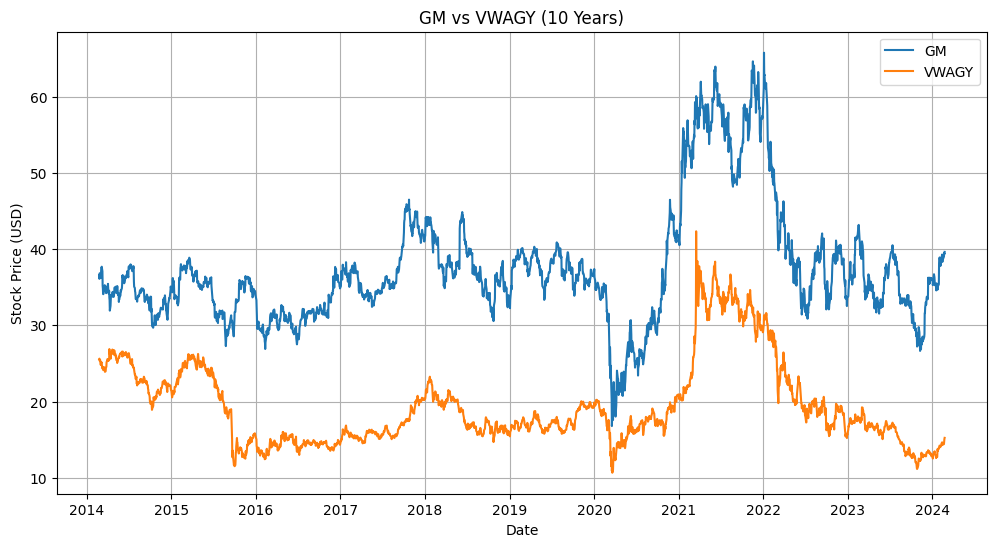

In [46]:
# Import the packages needed for this task:
import matplotlib.pyplot as plt

ticker1 = 'GM'
ticker2 = 'VWAGY'

# Download the data
data1 = yf.download(ticker1, period='10y')['Close']
data2 = yf.download(ticker2, period='10y')['Close']


# Plot the 'Close' data:
plt.figure(figsize=(12, 6))
plt.plot(data1, label=ticker1)
plt.plot(data2, label=ticker2)
plt.title(ticker1 + ' vs ' + ticker2 + ' (10 Years)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

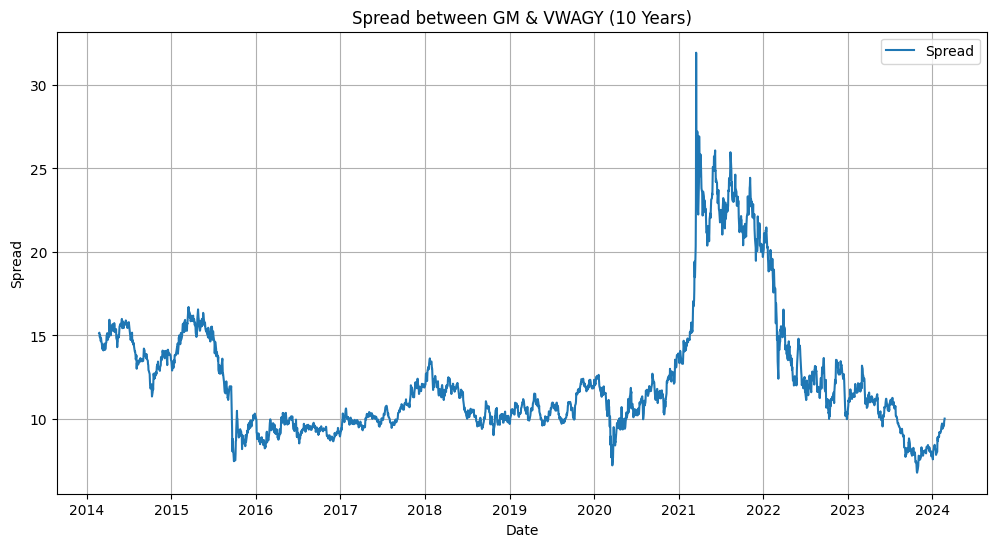

In [47]:
# Plot the spread:
plt.figure(figsize=(12, 6))
plt.plot(spread, label='Spread')
plt.title('Spread between ' + ticker1 + ' & ' + ticker2 +  ' (10 Years)')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# Import the packages needed for this task:
from scipy.stats import spearmanr

# Align the dataframes
data1, data2 = data1.align(data2, join='inner')

# Calculate the daily returns:
data1_returns = data1.pct_change().dropna()
data2_returns = data2.pct_change().dropna()

# Compute Spearman Rank Correlation Coefficient:
spearman_corr, p_value = spearmanr(data1_returns, data2_returns)

# Display the results:
print(f"Spearman Rank Correlation Coefficient: {spearman_corr:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman Rank Correlation Coefficient: 0.448
P-value: 0.000


# Backtesting

#### Conducts backtesting and calculates Sharpe ratio. This is where you optimize all parameters for pairs.

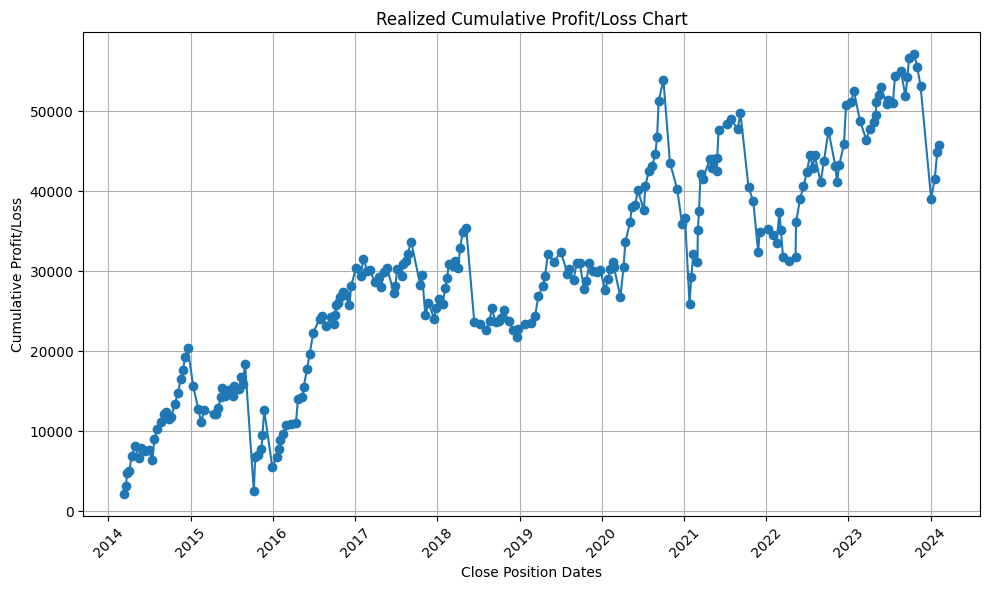

In [49]:
# Calculate the spread:
spread = data2 - data1

# Bollinger Band Parameters:
rolling_window = 8     # This is used for determining how many days ahead to use to calculate the rolling mean
rolling_mean = (spread.rolling(window=rolling_window).mean()).dropna()
rolling_std = (spread.rolling(window=rolling_window).std()).dropna()
upper_band = rolling_mean + (rolling_std * 1.5)
lower_band = rolling_mean - (rolling_std * 1.5)

# Capital to allocate to each trade in the pairs trade:
money_per_trade = 50000

# Convert capital to shares:
data1_share_quant = money_per_trade/data1
data2_share_quant = money_per_trade/data2

daily_returns = []
trade_log = []
position_open = False
position_type = None

for date, current_spread in spread.items():
    if date not in data1.index or date not in upper_band.index:
        continue
    data1_price = data1.get(date, None)
    data2_price = data2.get(date, None)
    lower_band_value = lower_band[date]
    upper_band_value = upper_band[date]
    mean_value = rolling_mean[date]
    data1_shares = data1_share_quant.get(date, None)
    data2_shares = data2_share_quant.get(date, None)
    if current_spread < lower_band_value and not position_open:
        # Open a pairs trade position (short data1, long data2)
        trade_log.append({
            'Date': date,
            'Action': 'Open Position',
            'Type': 'lower',
            ticker1 + '_Shares': data1_shares,
            ticker2 + '_Shares': data2_shares,
            ticker1 + '_Price': data1_price,
            ticker2 + '_Price': data2_price
        })
        position_open = True
        position_type = 'lower'
        
    elif current_spread > upper_band_value and not position_open:
        # Open a different pairs trade position (long data1, short data2)
        trade_log.append({
            'Date': date,
            'Action': 'Open Position',
            'Type': 'upper',
            ticker1 + '_Shares': data1_shares,
            ticker2 + '_Shares': data2_shares,
            ticker1 + '_Price': data1_price,
            ticker2 + '_Price': data2_price
        })
        position_open = True
        position_type = 'upper'
    
    elif current_spread > mean_value and position_open and position_type == 'lower':
        # Close position opened at lower band
        trade_log.append({
            'Date': date,
            'Action': 'Close Position',
            'Type': 'lower',
            ticker1 + '_Shares': data1_shares,
            ticker2 + '_Shares': data2_shares,
            ticker1 + '_Price': data1_price,
            ticker2 + '_Price': data2_price
        })
        position_open = False
        
    elif current_spread < mean_value and position_open and position_type == 'upper':
        # Close position opened at upper band
        trade_log.append({
            'Date': date,
            'Action': 'Close Position',
            'Type': 'upper',
            ticker1 + '_Shares': data1_shares,
            ticker2 + '_Shares': data2_shares,
            ticker1 + '_Price': data1_price,
            ticker2 + '_Price': data2_price
        })
        position_open = False

# Save the trade log DataFrame to a csv file for a visual sanity check:
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')

total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []
for index, trade in trade_log_df.iterrows():
    if trade['Action'] == 'Open Position':
        open_position = trade
    elif trade['Action'] == 'Close Position' and open_position is not None:
        pnl = 0
        # Assuming 'HMC_Shares' and 'HYMTF_Shares' are the quantities for each stock
        if open_position['Type'] == 'lower':
            pnl += (open_position[ticker1 + '_Price'] - trade[ticker1 + '_Price']) * open_position[ticker1 + '_Shares']
            pnl += (trade[ticker2 + '_Price'] - open_position[ticker2 + '_Price']) * open_position[ticker2 + '_Shares']
        elif open_position['Type'] == 'upper':
            pnl += (trade[ticker1 + '_Price'] - open_position[ticker1 + '_Price']) * open_position[ticker1 + '_Shares']
            pnl += (open_position[ticker2 + '_Price'] - trade[ticker2 + '_Price']) * open_position[ticker2 + '_Shares']

        total_return += pnl
        close_position_dates.append(trade['Date'])
        close_position_returns.append(pnl)
        
        # Reset open_position for the next trade
        open_position = None

profit_loss_df = pd.DataFrame({'Profit/Loss': close_position_returns}, index=close_position_dates)
profit_loss_df.to_csv('returns.csv')

# Calculate the cumulative profit and loss:
profit_loss_df['Cumulative PnL'] = profit_loss_df['Profit/Loss'].cumsum()

# Plot:
plt.figure(figsize=(10, 6))
plt.plot(profit_loss_df.index, profit_loss_df['Cumulative PnL'], marker='o', linestyle='-')
plt.title('Realized Cumulative Profit/Loss Chart')
plt.xlabel('Close Position Dates')
plt.ylabel('Cumulative Profit/Loss')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Annual Sharpe Ratio:
 Year
2014    3.913276
2015   -0.844364
2016    4.298701
2017   -0.373897
2018   -0.280100
2019    0.834064
2020    0.305599
2021   -0.109468
2022    1.208166
2023    0.148083
2024   -0.218075
Name: Returns, dtype: float64

Number of Trades per Year:
 Year
2014    24
2015    24
2016    26
2017    24
2018    24
2019    20
2020    23
2021    23
2022    23
2023    21
2024     4
dtype: int64

Average Sharpe Ratio: 0.8074532254316469


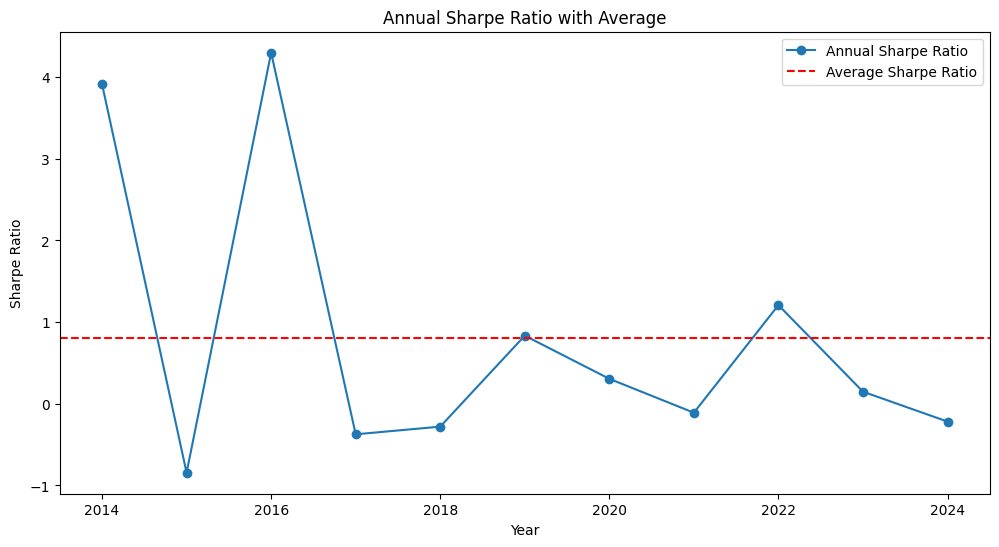

In [50]:
# Import the packages needed for this task:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert the PnL to returns:
capital = 100000  # Adjust this as per your initial capital
profit_loss_df['Returns'] = profit_loss_df['Profit/Loss'] / capital

# Group the data by year using the index:
profit_loss_df['Year'] = profit_loss_df.index.year

# Count the trades per year and calculate the average:
trades_per_year = profit_loss_df.groupby('Year').size()
average_trades_per_year = trades_per_year.mean()

# Calculate the annual return as well as the standard deviation:
annual_returns = profit_loss_df.groupby('Year')['Returns'].sum()
annual_std_dev = profit_loss_df.groupby('Year')['Returns'].std() * np.sqrt(average_trades_per_year)
annual_risk_free_rate = 0.01

# Calculate the annual Sharpe Ratio:
annual_sharpe_ratio = (annual_returns - annual_risk_free_rate) / annual_std_dev

# Calculate the average Sharpe Ratio:
average_sharpe_ratio = annual_sharpe_ratio.mean()


# Print info:
print("Annual Sharpe Ratio:\n", annual_sharpe_ratio)
print("\nNumber of Trades per Year:\n", trades_per_year)
print("\nAverage Sharpe Ratio:", average_sharpe_ratio)

# Plot:
plt.figure(figsize=(12, 6))
plt.plot(annual_sharpe_ratio, label='Annual Sharpe Ratio', marker='o')
plt.axhline(y=average_sharpe_ratio, color='r', linestyle='--', label='Average Sharpe Ratio')
plt.title('Annual Sharpe Ratio with Average')
plt.xlabel('Year')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()